# What is approximate depth of a decision tree trained(without restrictions) on a training set with one million instances 

## The Depth of a wellbalanced binray tree contining m leaves is equal to log2(m),rounded up 
## log2(m)=log(m)/log (2)


# Is a node's Gini impurity generally lower or higher then it parent's?

## A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child's impurity. 

## For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)² – (4/5)² = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node's Gini impurity is 1 – (1/2)² – (1/2)² = 0.5, which is higher than its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent's Gini impurity.

# If a decision tree is overfitting the training set , is it a good idea to try decreaing max_depth

## If a Decision tree id over fitting the training set , it may be a good idea to decrease mac_depth , since this will constrain the model , regularizing it 

# If a decision tree is underfitting the training set, is it a good indea to try scaling the input features? 

## Decision tree are often called nonparametic models.Which means that "If left unconstrained, the tree struture will adapt itself to the traning data, fitting it very well - indeed overfitting it ". So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

# 7

In [13]:
from sklearn.datasets import make_moons
## importing the dataset and then making the paratation into X and Y
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split
#spillting the dataset into two parts 

X_train,X_test,y_train,y_test=train_test_split(X_moons,y_moons,test_size=0.2,random_state=42)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [19]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score
## testesd the accuray 
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

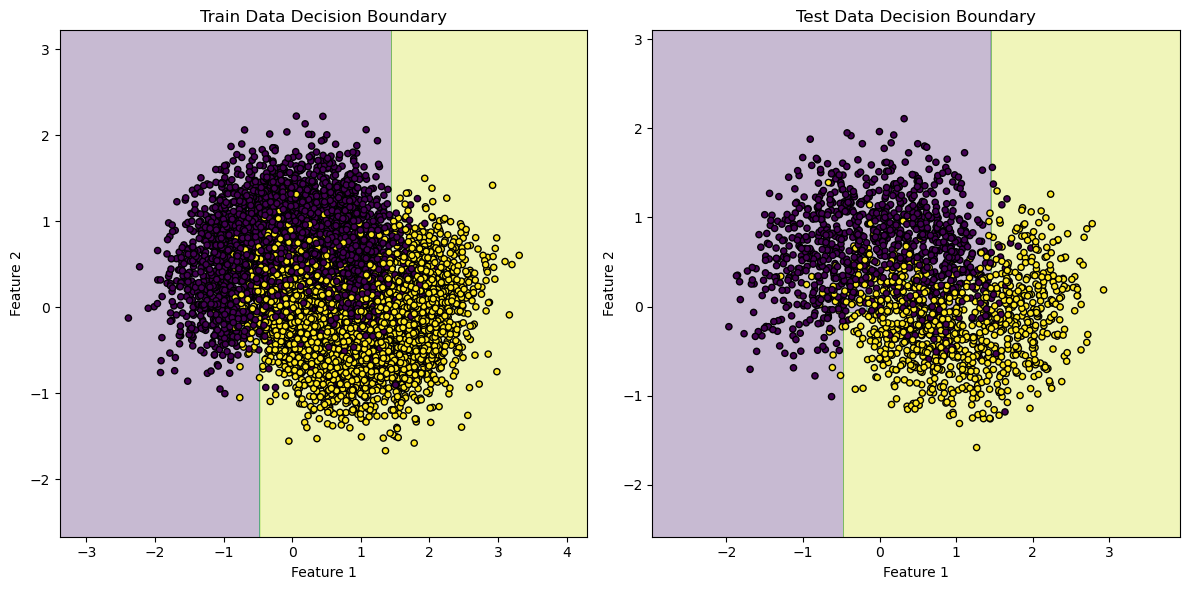

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Best model from GridSearchCV
best_model = grid_search_cv.best_estimator_

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(best_model, X_train, y_train, "Train Data Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundary(best_model, X_test, y_test, "Test Data Decision Boundary")

plt.tight_layout()
plt.show()


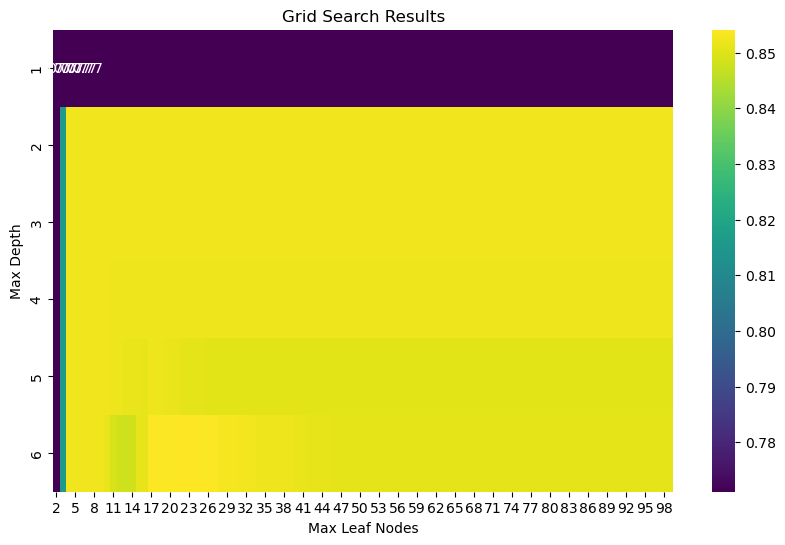

In [22]:
import seaborn as sns
import pandas as pd

# Convert GridSearchCV results to a DataFrame
results = pd.DataFrame(grid_search_cv.cv_results_)

# Pivot table for heatmap
pivot_table = results.pivot_table(index='param_max_depth', columns='param_max_leaf_nodes', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Results')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Max Depth')
plt.show()


In [23]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Accuracy Score: 0.86


# 8. Grow A forest 

In [26]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [25]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8056605